## Hands-on implementation hierarchical clustering

In this notebook, we will implement hierarchical clustering in a real-world clustering problem. 

In this implementation, we are going to use the iris flower dataset. The dataset contains the dimensional information for 3 flower species - their sepal and petal widths and lengths. By using these features, our task is to create clusters and put each species of flower in a cluster. 

####  Load and read the data

First, we will load the data stored in a CSV file using the Pandas library.

In [1]:
# Import Pandas
import pandas as pd

# Read the data
data = pd.read_csv('Iris.csv')

Let’s take a look at the top 5 rows of the dataset and also the shape of the same. 

In [2]:
# Visualize the samples
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Check the shape of data
data.shape

(150, 6)

#### Defining input features

From the above output, there are 6 columns out of which we need to use 4 columns named Sepal’s length & width and Petal’s length & width to create clusters. These four columns will be used as input to the Hierarchical algorithm.  

In [4]:
# Defining input (X) features
X = data.iloc[:,1:5].values

# Size of X
X.shape

(150, 4)

As we can see we have successfully created the input features set.

#### Identifying no of clusters using Dendrogram

Now as we have created an input feature set, here we will create a Dendrogram of it. The dendrogram is a 2D plot that looks like a tree structure. On the y-axis, we have the Euclidean distance between data points, and on the x-axis, we have all data points.  

In Hierarchical clustering, a dendrogram is basically used to find the optimal number of clusters. To create and plot a dendrogram, we are using the dendrogram function from the SciPy library which computes graphs directly. 

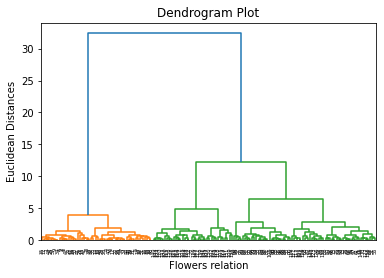

In [5]:
# Obtaining possible clusters
from scipy.cluster import hierarchy   
import matplotlib.pyplot as plt
dendro = hierarchy.dendrogram(hierarchy.linkage(X, method='ward'))  
plt.title("Dendrogram Plot")  
plt.ylabel("Euclidean Distances")  
plt.xlabel("Flowers relation") 
plt.show() 

In the above dendrogram function, we have passed the linkage function which takes the input features and linkage criteria. 

Now from the above dendrogram, we can find an optimal number of clusters to perform agglomerative clustering. For that, we have to look at the maximum vertical distance that does not cut any projection of horizontal bars (node junctions). 

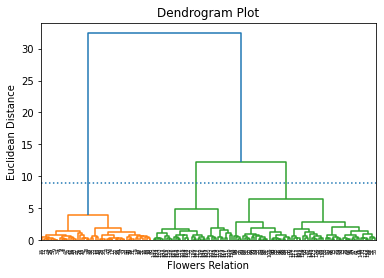

In [6]:
# Getting optimal number of clusters
dendro = hierarchy.dendrogram(hierarchy.linkage(X, method='ward')) 
plt.title("Dendrogram Plot") 
plt.ylabel("Euclidean Distance") 
plt.xlabel("Flowers Relation")
plt.axhline(y=9,linestyle='dotted')
plt.show()

In the above figure, A horizontal line has been drawn and a threshold distance has been defined (Generally, we try to set the threshold in such a way that it cuts the tallest vertical line). This threshold has been set to 9 and a horizontal line has been drawn.  

Now to get the optimal number of clusters we have to trace vertical lines that cut the dotted line, the number of lines that cut the dotted line is actually a number of clusters. Here it is 3, so we can set the number of clusters to be 3 based on it. We will train the model. 

#### Initializing and training the Agglomerative Hierarchical Clustering (AHC)

Now we are with the required optimal number of clusters. We now import Agglomerative clustering from the sklearn library and will train on our training patterns.  

In [7]:
# Performing ahc
from sklearn.cluster import AgglomerativeClustering
ahc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')

# Train and predict clusters
pred = ahc.fit_predict(X) 

#### Plotting the clusters

As we have trained and generated the predictions, here we will plot those clusters. Before plotting, let's take look at the predictions.

In [8]:
# Predicting result
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

In the above results,  0,1,2 are labels for clusters for respective data points. Now we are going to visualize these identified clusters using a scatter plot. We have trained the algorithm for 4 features, in the scatter plot we will make use of 2 features namely Sepal length and Petal length to visualize the cluster. 

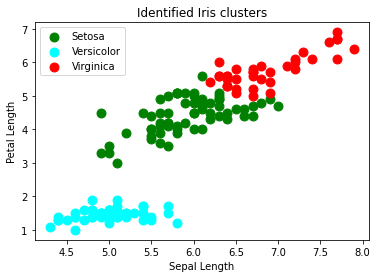

In [9]:
# Plotting the clusters 
plt.scatter(X[pred == 0, 0], X[pred == 0, 2], s = 80, c = 'green', label = 'Setosa')
plt.scatter(X[pred == 1, 0], X[pred == 1, 2], s = 80, c = 'cyan', label = 'Versicolor')
plt.scatter(X[pred == 2, 0], X[pred == 2, 2], s = 80, c = 'red', label = 'Virginica')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Identified Iris clusters')
plt.legend()

From the above plot, we can see how agglomerative clusters have separated the data points according to their characteristics. 

So this is how we can implement the Hierarchical clustering algorithm for unsupervised learning.